page 21

next: explore bend radius, hypothesis = wider bend -> better dispersion -> better resolution if magnitude can be held low

p_bend_radius = 0.25
p_bend_angle = 100.0
p_drift_post_aperture = 0.001647845131336711
p_drift_pre_bend = 0.08264476762309475
p_drift_post_bend = 0.07893060501596277
p_drift_pre_hodoscope = [fit]
p_m5a_length = 0.06981600194372625
p_m5a_quad = 0.4
p_m5b_length = 0.06928842409139782
p_m5b_quad = 0.1179451296465932
p_shape_in_1 = -0.1249745550920304
p_shape_out_1 = -0.10147496294559

Magnification: -0.7075923682210754
Focus: -5.365359545539405e-09
Dispersion: 0.5186298858380054
Resolution: 0.027286987793915626


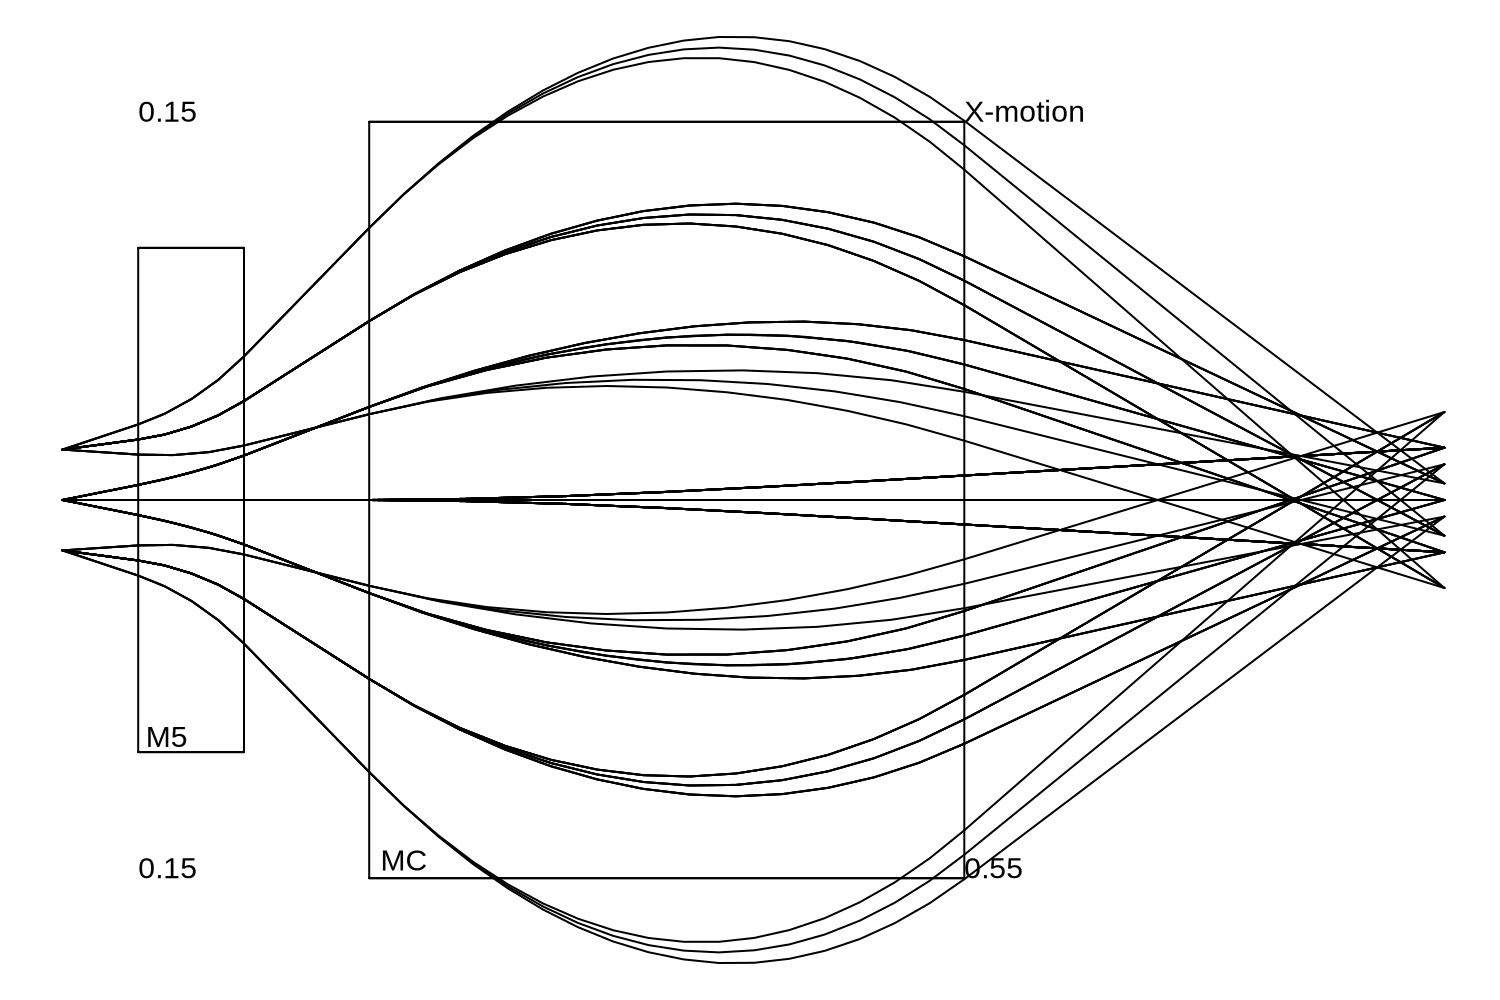

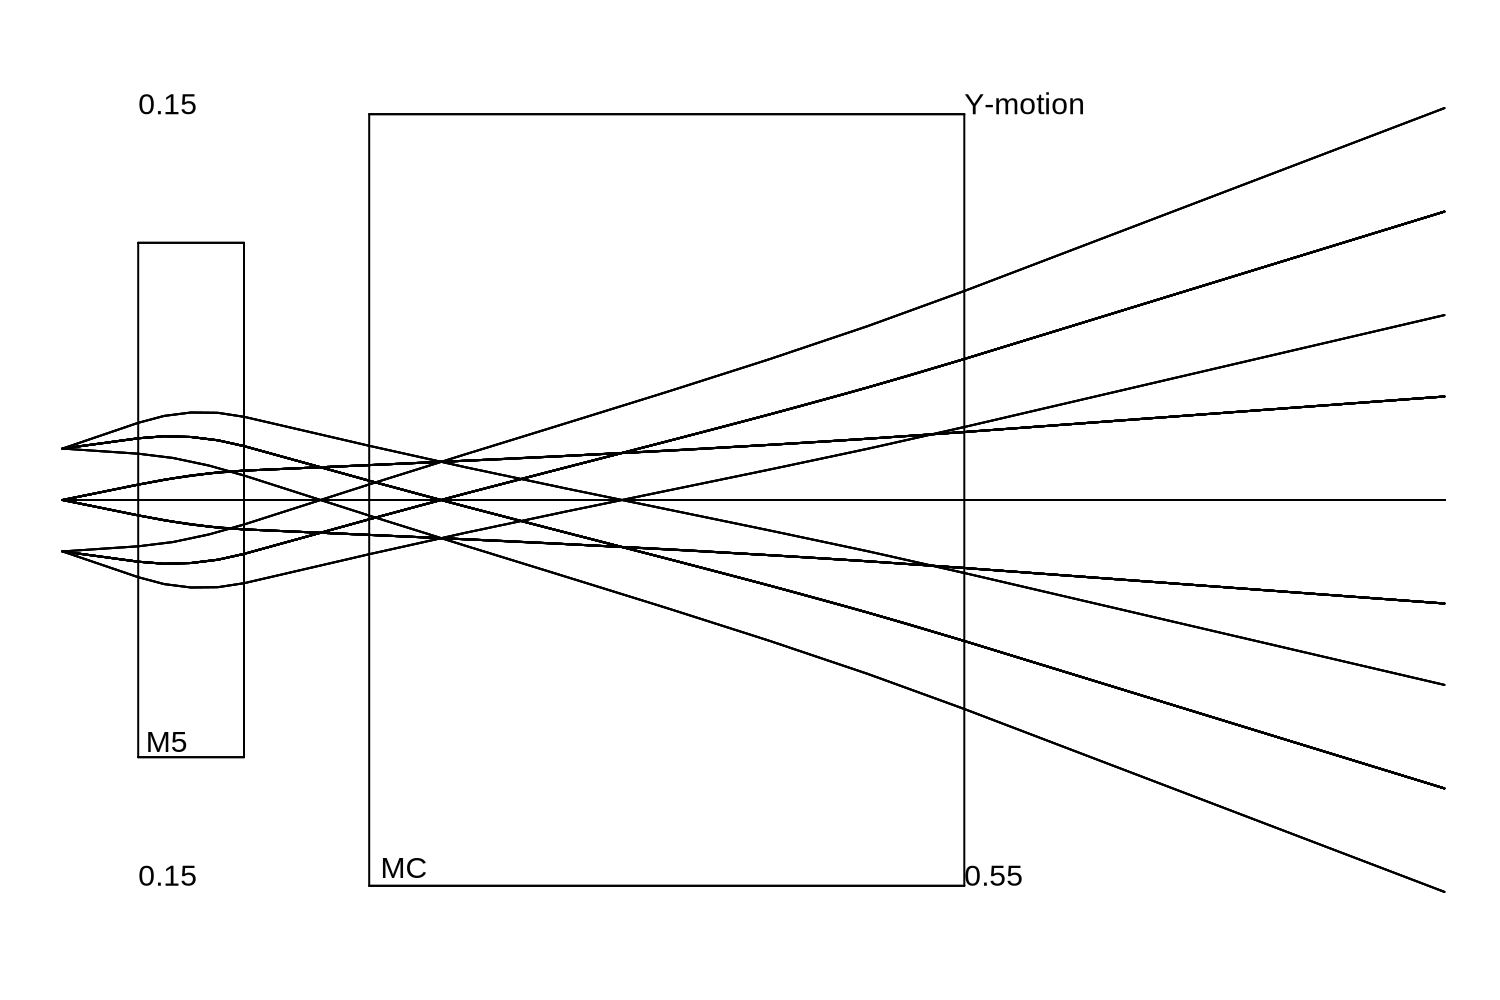

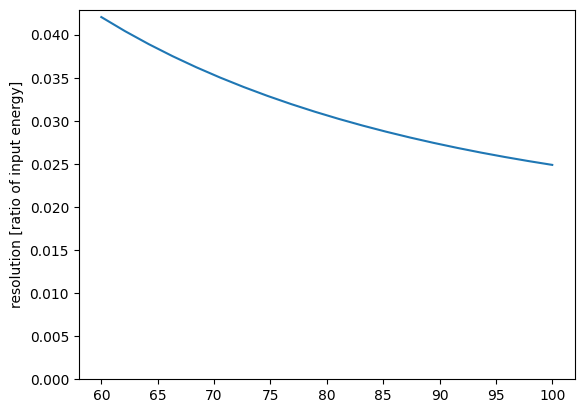

In [47]:
from mrs_ion_optics import gen_charictaristic_rays, MRSIonOptics
import mrs_ion_optics as K
from IPython.core.display import SVG, display_svg
import numpy as np
import matplotlib.pyplot as plt

R_FOIL = 0.015
L_DRIFT = 0.25
R_APERTURE = 0.01

sess = (
    MRSIonOptics()
    .set_parameter(K.K_p_m5a_quad, 0.4)
    # .set_parameter(K.K_p_m5a_length, 0.05)
    # .set_parameter(K.K_p_drift_pre_bend, 0.05)
    # .set_parameter(K.K_p_drift_post_bend, 0.05)
    # .set_parameter(K.K_p_m5b_quad, -0.03)
    # .set_parameter(K.K_p_m5b_length, 0.2)
    # .set_parameter(K.K_p_bend_angle, 90)
    .set_parameter(K.K_p_bend_radius, 0.25)
    .config_fit([K.K_p_drift_pre_hodoscope])
    .config_order(1)
    .config_vis_lab_coordinates(False)
    .config_outputs(["ME(1,1)","ME(1,2)","ME(1,6)"])
    .set_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3), color=6)
    .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3,energy=-0.02), color=3)
    .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3,energy=0.02), color=2)
)

# X = np.linspace(-0.25,0.5,20)
# V = np.array([sess.set_parameter(K.K_p_m5a_quad,x).exec()[1] for x in X])
# X = np.linspace(0.05,0.8,20)
# V = np.array([sess.set_parameter(K.K_p_bend_radius,x).exec()[1] for x in X])
X = np.linspace(60,100,20)
V = np.array([sess.set_parameter(K.K_p_bend_angle,x).exec()[1] for x in X])
plt.plot(X, np.abs(2*R_APERTURE*V[:, 0] / V[:, 2]))
plt.ylim(bottom = 0)
plt.ylabel("resolution [ratio of input energy]")

sess.print_params()
print()

# outputs, _ = sess.set_parameter(K.K_p_m5a_quad, 0.4).exec_fit()
# outputs, _ = sess.set_parameter(K.K_p_bend_radius, 0.25).exec_fit()
outputs, _ = sess.set_parameter(K.K_p_bend_angle, 90).exec_fit()
print("Magnification:", outputs[0])
print("Focus:", outputs[1])
print("Dispersion:", outputs[2])
print("Resolution:", abs(2 * R_APERTURE * outputs[0] / outputs[2]))
for svg_data in sess.exec_svg():
    display_svg(SVG(data=svg_data))

In [2]:
from mrs_ion_optics import gen_charictaristic_rays, MRSIonOptics
import mrs_ion_optics as K
from IPython.core.display import SVG, display_svg
import numpy as np
import matplotlib.pyplot as plt
from util import begin_timer

R_FOIL = 0.015
L_DRIFT = 0.25
R_APERTURE = 0.015

# A is linear fit step, B is nonlinear fit step

p_lims = {
    # A
    # K.K_p_bend_radius: (0.05, 0.5),
    # K.K_p_bend_angle: (30.0, 120.0),
    # K.K_p_drift_post_aperture: (0.001, 0.4),
    # K.K_p_drift_pre_bend: (0.001, 0.4),
    # K.K_p_drift_post_bend: (0.001, 0.4),
    # K.K_p_m5a_length: (0.05, 0.2),
    # K.K_p_m5a_quad: (-0.2, 0.4),
    # K.K_p_m5b_length: (0.05, 0.2),
    # K.K_p_m5b_quad: (-0.4, 0.4),
    # K.K_p_m5c_length: (0.05, 0.2),
    # K.K_p_m5c_quad: (-0.4, 0.4),
    # K.K_p_shape_in_1: (-0.25, 0.25),
    # K.K_p_shape_out_1: (-0.25, 0.25),

    # # B
    # K.K_p_m5a_hex: (-0.4,0.4),
    # K.K_p_m5a_oct: (-0.4,0.4),
    # K.K_p_m5a_dec: (-0.4,0.4),
    # K.K_p_m5a_dodec: (-0.4,0.4),
    # K.K_p_m5b_hex: (-0.4,0.4),
    # K.K_p_m5b_oct: (-0.4,0.4),
    # K.K_p_m5b_dec: (-0.4,0.4),
    # K.K_p_m5b_dodec: (-0.4,0.4),
    # K.K_p_shape_in_2: (-0.25, 0.25),
    # K.K_p_shape_in_3: (-0.25, 0.25),
    # K.K_p_shape_in_4: (-0.25, 0.25),
    # K.K_p_shape_in_5: (-0.25, 0.25),
    # K.K_p_shape_out_2: (-0.25, 0.25),
    # K.K_p_shape_out_3: (-0.25, 0.25),
    # K.K_p_shape_out_4: (-0.25, 0.25),
    # K.K_p_shape_out_5: (-0.25, 0.25),


    # K.K_p_bend_angle: (30.0, 120.0),
    K.K_p_drift_post_aperture: (0.05, 0.2),
    K.K_p_drift_pre_bend: (0.05, 0.2),
    K.K_p_drift_post_bend: (0.05, 0.2),
    # K.K_p_m5a_length: (0.05, 0.2),
    K.K_p_m5a_quad: (-0.5, 0.5),
    # K.K_p_m5b_length: (0.05, 0.2),
    K.K_p_m5b_quad: (-0.5, 0.5),
    # K.K_p_m5c_length: (0.05, 0.2),
    K.K_p_m5c_quad: (-0.5, 0.5),
    # K.K_p_m5d_length: (0.05, 0.2),
    K.K_p_m5d_quad: (-0.5, 0.5),
    K.K_p_shape_in_1: (-0.3, 0.3),
    K.K_p_shape_out_1: (-0.3, 0.3),
}


	# WV:=;
	# WVY:=(VMAX(RAY(3))-VMIN(RAY(3)))/2;
sess = (
    # sess
    MRSIonOptics()
    # .disable_fit()
    .config_fit([K.K_p_drift_pre_hodoscope])
    .config_order(1) # A
    # .config_order(5) # B
    .config_vis_lab_coordinates(False)
    .config_outputs([
        # f"ABS({2 * R_APERTURE}*ME(1,1)/ME(1,6))", # resolution as fraction of input energy
        "ME(1,1)", # magnification (dispersive direction)
        "ME(1,2)", # focus (dispersive direction)
        "ME(1,6)", # dispersion (dispersive direction)
        "ME(3,1)", # magnification (vertical direction)
        "ME(3,2)", # focus (vertical direction)
        "(VMAX(RAY(1))-VMIN(RAY(1)))/2", # image size (dispersive direction)
        "(VMAX(RAY(3))-VMIN(RAY(3)))/2", # image size (vertical direction)
        K.K_p_drift_pre_hodoscope,
    ],do_beamsize=True)
    .set_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3), color=6)
    # .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3, energy=-0.02), color=3)
    # .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3, energy=0.02), color=2)
    .set_parameter(K.K_p_m5a_length,0.1)
    .set_parameter(K.K_p_m5b_length,0.1)
    .set_parameter(K.K_p_m5c_length,0.1)
    .set_parameter(K.K_p_m5d_length,0.1)
    .set_parameter(K.K_p_bend_radius,0.3)
    # .set_parameter(K.K_p_bend_angle,110)
    .set_parameter(K.K_p_bend_angle,90)
)

# uncertainties = []
# uncertainties = [1]
uncertainties = [1]*5+[0.1]*2+[0.01]*2
# uncertainties = [1,0.3]
# uncertainties = [1,1,0.5]
# uncertainties = [1,0.1]
# uncertainties = [1,0.3,0.1,0.03,0.01]
# uncertainties = [1,0.5,0.25,0.125,0.0625]
# uncertainties = [1,1,1,0.5,0.5,0.25,0.25,0.125,0.125,0.0625,0.0625]
# uncertainties = [1,1,1,0.5,0.5,0.25,0.25]
# uncertainties = [1,1,1,1,0.5,0.5,0.25,0.125,0.0625]*3
enable_randomness = True
divs_per_uncertainty_step = 128
# divs_per_uncertainty_step = 64
# divs_per_uncertainty_step = 32
# divs_per_uncertainty_step = 16
# divs_per_uncertainty_step = 8
update_timer = begin_timer("optimization")
i = 0
n = len(uncertainties) * len(p_lims)
if enable_randomness:
    for k in p_lims.keys():
        sess.set_parameter(k, np.random.random()*(p_lims[k][1]-p_lims[k][0])+p_lims[k][0])
for uncertainty in uncertainties:
# for uncertainty in [1,0.3,0.1,0.03,0.01]:
# for uncertainty in [1]:
    p_keys = list(p_lims.keys())
    if enable_randomness:
        np.random.shuffle(p_keys)
    for k in p_keys:
        p_lim = p_lims[k]
        BEFORE = sess.parameter_values[k]
        X_ = np.linspace(-0.5, 0.5, divs_per_uncertainty_step)
        if enable_randomness:
            X_ *= 1 - 1/divs_per_uncertainty_step
            X_ += np.random.uniform(-0.5,0.5)/divs_per_uncertainty_step
        X = (
            X_ * uncertainty * (p_lim[1] - p_lim[0])
            + sess.parameter_values[k]
        )
        X += np.clip(p_lim[0] - X[0], a_min=0, a_max=None)
        X += np.clip(p_lim[-1] - X[1], a_min=None, a_max=0)
        # print(k,p_lim, X)
        # X += np.clip(p_lim[0] - X[0], a_min=None, a_max=0)
        # X += np.clip(p_lim[-1] - X[1], a_min=0, a_max=None)
        # R = [sess.set_parameter(k, x).exec() for x in X]
        R = [x() for x in [sess.set_parameter(k, x).exec_async() for x in X]]
        (
            # V_resolution,
            V_magnification,
            V_focus,
            V_dispersion,
            V_magnification_y,
            V_focus_y,
            V_imagesize_x,
            V_imagesize_y,
            V_final_drift,
        ) = np.transpose([r[1] for r in R])
        V_beam_widths = np.array([r[3] for r in R]) # [X.size, 6]
        V_resolution = np.abs(2*R_APERTURE*V_magnification / V_dispersion)
        # V_resolution = V_imagesize_x/V_dispersion
        # sess.set_parameter(k,X[np.argmin(
        #     np.sum(np.abs([
        #     # np.max(np.abs([
        #         V_resolution/0.010*40,
        #         V_focus*1e5,
        #         V_magnification/0.1*10.0,
        #         np.abs(V_imagesize_x)/0.01*40,
        #         0.05/V_dispersion*20,
        #         # V_imagesize_y*4.0,
        #         # V_focus_y+V_magnification_y,
        #     ]),axis=0)
        #     +(
        #         np.sum(np.clip(np.abs(V_beam_widths)-0.020,a_min=0,a_max=None),axis=1)[:,0]/0.010*100
        #         + np.sum(np.clip(np.abs(V_beam_widths)-0.010,a_min=0,a_max=None),axis=1)[:,1]/0.010*50
        #     )
        # )])

        loss = np.sum(np.abs([
            # np.max(np.abs([
                V_resolution/0.01*500,
                
                V_focus*1e9,
                # V_magnification*10.0,
                # (np.abs(V_imagesize_x)-0.0005)*500,
                V_imagesize_x/0.01*100,
                # 40/V_dispersion,
                # np.clip(V_imagesize_y/0.05-1,a_min=0,a_max=None)*10,
                # V_focus_y+V_magnification_y,
                # np.exp(10*np.clip(0.4-V_final_drift,0,None)),
            ]),axis=0)+10000*(
                np.sum(np.clip(np.abs(V_beam_widths)-0.05,a_min=0,a_max=None),axis=1)[:,0]
                +np.sum(np.clip(np.abs(V_beam_widths)-0.03,a_min=0,a_max=None),axis=1)[:,1]
            )
        # print(loss)
        loss[np.isnan(loss)] = 100000

        # plt.plot(X, loss)
        # plt.xlabel(k)
        # plt.ylabel("loss")
        # plt.show()

        sess.set_parameter(k,X[np.argmin(
            loss
        )])

        AFTER = sess.parameter_values[k]
        # print((AFTER-BEFORE)/(X[1]-X[-1]),k, BEFORE,AFTER)

        i += 1
        update_timer(i/n)



# sess.config_order(5).config_fit(
#         [
#             K.K_p_m5a_hex,
#             K.K_p_m5a_oct,
#             K.K_p_m5a_dec,
#             K.K_p_m5a_dodec,
#             K.K_p_m5b_hex,
#             K.K_p_m5b_oct,
#             K.K_p_m5b_dec,
#             K.K_p_m5b_dodec,
#             K.K_p_shape_in_2,
#             K.K_p_shape_in_3,
#             K.K_p_shape_in_4,
#             K.K_p_shape_in_5,
#             K.K_p_shape_out_2,
#             K.K_p_shape_out_3,
#             K.K_p_shape_out_4,
#             K.K_p_shape_out_5,
#         ],
#         algorithm=MRSIonOptics.FIT_ALGO_SYMPLECTIC,
#         fit_objective_beamsize=True,
#     ).exec_fit()
# sess.config_order(1).config_fit([K.K_p_drift_pre_hodoscope])

# sess.exec_fit()
(
    # V_resolution,
    V_magnification,
    V_focus,
    V_dispersion,
    V_magnification_y,
    V_focus_y,
    # V_yarg,
    V_imagesize_x,
    V_imagesize_y,
    h
), _, _ = (
    # sess.exec_fit(use_gui=True)
    sess.exec_fit(use_gui=False)
    # sess
    # .config_order(5)
    # .config_fit(
    #     [
    #         K.K_p_m5a_hex,
    #         K.K_p_m5a_oct,
    #         K.K_p_m5a_dec,
    #         K.K_p_m5a_dodec,
    #         K.K_p_m5b_hex,
    #         K.K_p_m5b_oct,
    #         K.K_p_m5b_dec,
    #         K.K_p_m5b_dodec,
    #         K.K_p_shape_in_2,
    #         K.K_p_shape_in_3,
    #         K.K_p_shape_in_4,
    #         K.K_p_shape_in_5,
    #         K.K_p_shape_out_2,
    #         K.K_p_shape_out_3,
    #         K.K_p_shape_out_4,
    #         K.K_p_shape_out_5,
    #     ],
    #     algorithm=MRSIonOptics.FIT_ALGO_SYMPLECTIC,
    #     fit_objective_beamsize=True,
    # )
    # .exec_fit(use_gui=False)
)
V_resolution_1st_order = np.abs(2 * R_APERTURE * V_magnification / V_dispersion)
V_resolution = 2*V_imagesize_x/V_dispersion
sess.config_fit([]).print_params()
print()
print("Magnification:", V_magnification)
print("Focus:", V_focus)
print("Dispersion:", V_dispersion)
print("Resolution [simplified]:", V_resolution_1st_order)
print("Resolution:", V_resolution)
print("Dispersive Image Size:", V_imagesize_x*2)
for svg_data in (sess
        .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3, energy=-0.01), color=3)
        .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3, energy=0.01), color=2)
        .exec_svg()
):
    display_svg(SVG(data=svg_data))

[12:20:09]  optimization:  1.23%  1.4s/111.3s  ETA: 12:21:59 [T-109.9s]
[12:20:12]  optimization:  3.7%  4.0s/108.9s  ETA: 12:21:57 [T-104.9s]


KeyboardInterrupt: 

[18:06:14]  optimization:  0.02%  1.4s/94.0min  ETA: 19:40:10 [T-93.9min]
[18:06:17]  optimization:  0.07%  4.1s/93.3min  ETA: 19:39:30 [T-93.2min]
[18:06:20]  optimization:  0.12%  6.9s/93.0min  ETA: 19:39:10 [T-92.8min]
[18:06:24]  optimization:  0.2%  10.9s/92.4min  ETA: 19:38:34 [T-92.2min]
[18:06:29]  optimization:  0.3%  16.3s/91.4min  ETA: 19:37:38 [T-91.1min]
[18:06:37]  optimization:  0.44%  24.3s/91.0min  ETA: 19:37:12 [T-90.6min]
[18:06:49]  optimization:  0.67%  36.4s/91.1min  ETA: 19:37:16 [T-90.5min]
[18:07:07]  optimization:  0.99%  53.9s/90.9min  ETA: 19:37:07 [T-90.0min]
[18:07:33]  optimization:  1.48%  80.7s/90.8min  ETA: 19:36:59 [T-89.4min]
[18:08:13]  optimization:  2.2%  2.0min/91.2min  ETA: 19:37:24 [T-89.2min]
[18:09:11]  optimization:  3.23%  3.0min/92.0min  ETA: 19:38:11 [T-89.0min]
[18:10:39]  optimization:  4.81%  4.4min/92.2min  ETA: 19:38:22 [T-87.7min]
[18:12:49]  optimization:  7.19%  6.6min/92.0min  ETA: 19:38:15 [T-85.4min]
[18:16:04]  optimization:  

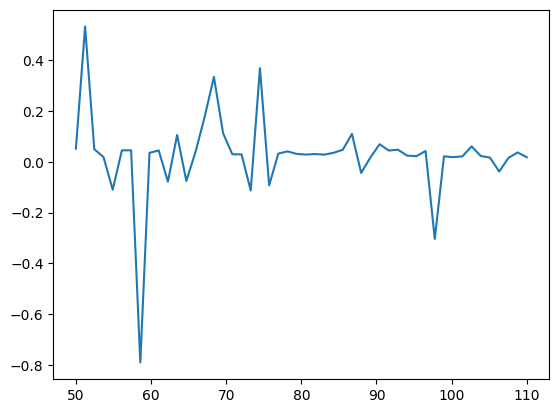

In [65]:
from mrs_ion_optics import gen_charictaristic_rays, MRSIonOptics
import mrs_ion_optics as K
from IPython.core.display import SVG, display_svg
import numpy as np
import matplotlib.pyplot as plt
from util import begin_timer

R_FOIL = 0.015
L_DRIFT = 0.25
R_APERTURE = 0.015

IN = np.linspace(50,110,50)
resolutions = []
update_timer = begin_timer("optimization")
n___ = 0
# A is linear fit step, B is nonlinear fit step
for angle_in in IN:
    p_lims = {
        # A
        # K.K_p_bend_radius: (0.05, 0.5),
        # K.K_p_bend_angle: (30.0, 120.0),
        # K.K_p_drift_post_aperture: (0.001, 0.4),
        # K.K_p_drift_pre_bend: (0.001, 0.4),
        # K.K_p_drift_post_bend: (0.001, 0.4),
        # K.K_p_m5a_length: (0.05, 0.2),
        # K.K_p_m5a_quad: (-0.2, 0.4),
        # K.K_p_m5b_length: (0.05, 0.2),
        # K.K_p_m5b_quad: (-0.4, 0.4),
        # K.K_p_m5c_length: (0.05, 0.2),
        # K.K_p_m5c_quad: (-0.4, 0.4),
        # K.K_p_shape_in_1: (-0.25, 0.25),
        # K.K_p_shape_out_1: (-0.25, 0.25),

        # # B
        # K.K_p_m5a_hex: (-0.4,0.4),
        # K.K_p_m5a_oct: (-0.4,0.4),
        # K.K_p_m5a_dec: (-0.4,0.4),
        # K.K_p_m5a_dodec: (-0.4,0.4),
        # K.K_p_m5b_hex: (-0.4,0.4),
        # K.K_p_m5b_oct: (-0.4,0.4),
        # K.K_p_m5b_dec: (-0.4,0.4),
        # K.K_p_m5b_dodec: (-0.4,0.4),
        # K.K_p_shape_in_2: (-0.25, 0.25),
        # K.K_p_shape_in_3: (-0.25, 0.25),
        # K.K_p_shape_in_4: (-0.25, 0.25),
        # K.K_p_shape_in_5: (-0.25, 0.25),
        # K.K_p_shape_out_2: (-0.25, 0.25),
        # K.K_p_shape_out_3: (-0.25, 0.25),
        # K.K_p_shape_out_4: (-0.25, 0.25),
        # K.K_p_shape_out_5: (-0.25, 0.25),


        # K.K_p_bend_angle: (30.0, 120.0),
        K.K_p_drift_post_aperture: (0.05, 0.2),
        K.K_p_drift_pre_bend: (0.05, 0.2),
        K.K_p_drift_post_bend: (0.05, 0.2),
        # K.K_p_m5a_length: (0.05, 0.2),
        K.K_p_m5a_quad: (-0.5, 0.5),
        # K.K_p_m5b_length: (0.05, 0.2),
        K.K_p_m5b_quad: (-0.5, 0.5),
        # K.K_p_m5c_length: (0.05, 0.2),
        K.K_p_m5c_quad: (-0.5, 0.5),
        # K.K_p_m5d_length: (0.05, 0.2),
        K.K_p_m5d_quad: (-0.5, 0.5),
        K.K_p_shape_in_1: (-0.3, 0.3),
        K.K_p_shape_out_1: (-0.3, 0.3),
    }


        # WV:=;
        # WVY:=(VMAX(RAY(3))-VMIN(RAY(3)))/2;
    sess = (
        # sess
        MRSIonOptics()
        # .disable_fit()
        .config_fit([K.K_p_drift_pre_hodoscope])
        .config_order(1) # A
        # .config_order(5) # B
        .config_vis_lab_coordinates(False)
        .config_outputs([
            # f"ABS({2 * R_APERTURE}*ME(1,1)/ME(1,6))", # resolution as fraction of input energy
            "ME(1,1)", # magnification (dispersive direction)
            "ME(1,2)", # focus (dispersive direction)
            "ME(1,6)", # dispersion (dispersive direction)
            "ME(3,1)", # magnification (vertical direction)
            "ME(3,2)", # focus (vertical direction)
            "(VMAX(RAY(1))-VMIN(RAY(1)))/2", # image size (dispersive direction)
            "(VMAX(RAY(3))-VMIN(RAY(3)))/2", # image size (vertical direction)
            K.K_p_drift_pre_hodoscope,
        ],do_beamsize=True)
        .set_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3), color=6)
        # .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3, energy=-0.02), color=3)
        # .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3, energy=0.02), color=2)
        .set_parameter(K.K_p_m5a_length,0.1)
        .set_parameter(K.K_p_m5b_length,0.1)
        .set_parameter(K.K_p_m5c_length,0.1)
        .set_parameter(K.K_p_m5d_length,0.1)
        .set_parameter(K.K_p_bend_angle,angle_in)
    )

    # uncertainties = []
    # uncertainties = [1]
    uncertainties = [1]*5+[0.1]*2+[0.01]*2
    # uncertainties = [1,0.3]
    # uncertainties = [1,1,0.5]
    # uncertainties = [1,0.1]
    # uncertainties = [1,0.3,0.1,0.03,0.01]
    # uncertainties = [1,0.5,0.25,0.125,0.0625]
    # uncertainties = [1,1,1,0.5,0.5,0.25,0.25,0.125,0.125,0.0625,0.0625]
    # uncertainties = [1,1,1,0.5,0.5,0.25,0.25]
    # uncertainties = [1,1,1,1,0.5,0.5,0.25,0.125,0.0625]*3
    enable_randomness = True
    divs_per_uncertainty_step = 128
    # divs_per_uncertainty_step = 64
    # divs_per_uncertainty_step = 32
    # divs_per_uncertainty_step = 16
    # divs_per_uncertainty_step = 8
    i = 0
    n = len(uncertainties) * len(p_lims)
    if enable_randomness:
        for k in p_lims.keys():
            sess.set_parameter(k, np.random.random()*(p_lims[k][1]-p_lims[k][0])+p_lims[k][0])
    for uncertainty in uncertainties:
    # for uncertainty in [1,0.3,0.1,0.03,0.01]:
    # for uncertainty in [1]:
        p_keys = list(p_lims.keys())
        if enable_randomness:
            np.random.shuffle(p_keys)
        for k in p_keys:
            p_lim = p_lims[k]
            BEFORE = sess.parameter_values[k]
            X_ = np.linspace(-0.5, 0.5, divs_per_uncertainty_step)
            if enable_randomness:
                X_ *= 1 - 1/divs_per_uncertainty_step
                X_ += np.random.uniform(-0.5,0.5)/divs_per_uncertainty_step
            X = (
                X_ * uncertainty * (p_lim[1] - p_lim[0])
                + sess.parameter_values[k]
            )
            X += np.clip(p_lim[0] - X[0], a_min=0, a_max=None)
            X += np.clip(p_lim[-1] - X[1], a_min=None, a_max=0)
            # print(k,p_lim, X)
            # X += np.clip(p_lim[0] - X[0], a_min=None, a_max=0)
            # X += np.clip(p_lim[-1] - X[1], a_min=0, a_max=None)
            # R = [sess.set_parameter(k, x).exec() for x in X]
            R = [x() for x in [sess.set_parameter(k, x).exec_async() for x in X]]
            (
                # V_resolution,
                V_magnification,
                V_focus,
                V_dispersion,
                V_magnification_y,
                V_focus_y,
                V_imagesize_x,
                V_imagesize_y,
                V_final_drift,
            ) = np.transpose([r[1] for r in R])
            V_beam_widths = np.array([r[3] for r in R]) # [X.size, 6]
            V_resolution = np.abs(2*R_APERTURE*V_magnification / V_dispersion)
            # V_resolution = V_imagesize_x/V_dispersion
            # sess.set_parameter(k,X[np.argmin(
            #     np.sum(np.abs([
            #     # np.max(np.abs([
            #         V_resolution/0.010*40,
            #         V_focus*1e5,
            #         V_magnification/0.1*10.0,
            #         np.abs(V_imagesize_x)/0.01*40,
            #         0.05/V_dispersion*20,
            #         # V_imagesize_y*4.0,
            #         # V_focus_y+V_magnification_y,
            #     ]),axis=0)
            #     +(
            #         np.sum(np.clip(np.abs(V_beam_widths)-0.020,a_min=0,a_max=None),axis=1)[:,0]/0.010*100
            #         + np.sum(np.clip(np.abs(V_beam_widths)-0.010,a_min=0,a_max=None),axis=1)[:,1]/0.010*50
            #     )
            # )])

            loss = np.sum(np.abs([
                # np.max(np.abs([
                    V_resolution/0.01*500,
                    
                    V_focus*1e9,
                    # V_magnification*10.0,
                    # (np.abs(V_imagesize_x)-0.0005)*500,
                    V_imagesize_x/0.01*100,
                    # 40/V_dispersion,
                    # np.clip(V_imagesize_y/0.05-1,a_min=0,a_max=None)*10,
                    # V_focus_y+V_magnification_y,
                    # np.exp(10*np.clip(0.4-V_final_drift,0,None)),
                ]),axis=0)+10000*(
                    np.sum(np.clip(np.abs(V_beam_widths)-0.05,a_min=0,a_max=None),axis=1)[:,0]
                    +np.sum(np.clip(np.abs(V_beam_widths)-0.03,a_min=0,a_max=None),axis=1)[:,1]
                )
            # print(loss)
            loss[np.isnan(loss)] = 100000

            # plt.plot(X, loss)
            # plt.xlabel(k)
            # plt.ylabel("loss")
            # plt.show()

            sess.set_parameter(k,X[np.argmin(
                loss
            )])

            AFTER = sess.parameter_values[k]
            # print((AFTER-BEFORE)/(X[1]-X[-1]),k, BEFORE,AFTER)

            i += 1
            update_timer((i/n+n___)/IN.size)



    # sess.config_order(5).config_fit(
    #         [
    #             K.K_p_m5a_hex,
    #             K.K_p_m5a_oct,
    #             K.K_p_m5a_dec,
    #             K.K_p_m5a_dodec,
    #             K.K_p_m5b_hex,
    #             K.K_p_m5b_oct,
    #             K.K_p_m5b_dec,
    #             K.K_p_m5b_dodec,
    #             K.K_p_shape_in_2,
    #             K.K_p_shape_in_3,
    #             K.K_p_shape_in_4,
    #             K.K_p_shape_in_5,
    #             K.K_p_shape_out_2,
    #             K.K_p_shape_out_3,
    #             K.K_p_shape_out_4,
    #             K.K_p_shape_out_5,
    #         ],
    #         algorithm=MRSIonOptics.FIT_ALGO_SYMPLECTIC,
    #         fit_objective_beamsize=True,
    #     ).exec_fit()
    # sess.config_order(1).config_fit([K.K_p_drift_pre_hodoscope])

    # sess.exec_fit()
    (
        # V_resolution,
        V_magnification,
        V_focus,
        V_dispersion,
        V_magnification_y,
        V_focus_y,
        # V_yarg,
        V_imagesize_x,
        V_imagesize_y,
        h
    ), _, _ = (
        # sess.exec_fit(use_gui=True)
        sess.exec_fit(use_gui=False)
        # sess
        # .config_order(5)
        # .config_fit(
        #     [
        #         K.K_p_m5a_hex,
        #         K.K_p_m5a_oct,
        #         K.K_p_m5a_dec,
        #         K.K_p_m5a_dodec,
        #         K.K_p_m5b_hex,
        #         K.K_p_m5b_oct,
        #         K.K_p_m5b_dec,
        #         K.K_p_m5b_dodec,
        #         K.K_p_shape_in_2,
        #         K.K_p_shape_in_3,
        #         K.K_p_shape_in_4,
        #         K.K_p_shape_in_5,
        #         K.K_p_shape_out_2,
        #         K.K_p_shape_out_3,
        #         K.K_p_shape_out_4,
        #         K.K_p_shape_out_5,
        #     ],
        #     algorithm=MRSIonOptics.FIT_ALGO_SYMPLECTIC,
        #     fit_objective_beamsize=True,
        # )
        # .exec_fit(use_gui=False)
    )
    V_resolution_1st_order = np.abs(2 * R_APERTURE * V_magnification / V_dispersion)
    V_resolution = 2*V_imagesize_x/V_dispersion
    resolutions.append(V_resolution)
    n___ += 1
plt.plot(IN,resolutions)

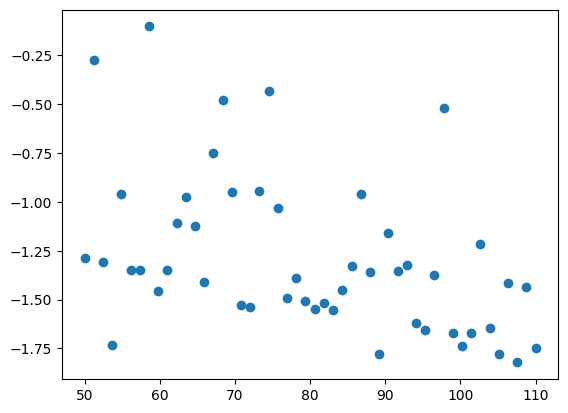

In [68]:
plt.scatter(IN,np.log10(np.abs(resolutions)))

In [69]:
resolutions

[np.float64(0.05172515949298989),
 np.float64(0.532639307877201),
 np.float64(0.049541367861907534),
 np.float64(0.018569793256254363),
 np.float64(-0.10995686623094465),
 np.float64(0.04505306312269143),
 np.float64(0.045084954974004166),
 np.float64(-0.7901325251324525),
 np.float64(0.03520112334477798),
 np.float64(0.04468988309418731),
 np.float64(-0.0783436240706997),
 np.float64(0.10554957118193413),
 np.float64(-0.07558928545497047),
 np.float64(0.038842308867762486),
 np.float64(0.17773175670714617),
 np.float64(0.3339776081455816),
 np.float64(0.11172938958470043),
 np.float64(0.02973172492160385),
 np.float64(0.02904000585738359),
 np.float64(-0.1130642709653004),
 np.float64(0.3686991820913205),
 np.float64(-0.09285136887403224),
 np.float64(0.032350499484429626),
 np.float64(0.040820429487123736),
 np.float64(0.031014609341518624),
 np.float64(0.0283666308232374),
 np.float64(0.03050507254438687),
 np.float64(0.02814357351961196),
 np.float64(0.035347664133308476),
 np.floa

In [49]:

sess.config_order(5).config_fit(
        [
            K.K_p_m5a_hex,
            K.K_p_m5a_oct,
            K.K_p_m5a_dec,
            K.K_p_m5a_dodec,
            K.K_p_m5b_hex,
            K.K_p_m5b_oct,
            K.K_p_m5b_dec,
            K.K_p_m5b_dodec,
            K.K_p_shape_in_2,
            K.K_p_shape_in_3,
            K.K_p_shape_in_4,
            K.K_p_shape_in_5,
            K.K_p_shape_out_2,
            K.K_p_shape_out_3,
            K.K_p_shape_out_4,
            K.K_p_shape_out_5,
        ],
        algorithm=MRSIonOptics.FIT_ALGO_SYMPLECTIC,
        fit_objective_beamsize=True,
    ).exec_fit()

(array([-9.06773734e-01, -7.42420292e-10,  7.77761488e-01,  0.00000000e+00,
         0.00000000e+00,  3.02948661e-02,  1.06761561e-01]),
 <function cosy.parse_transfer_map.<locals>.eval_map(args: Union[numpy._typing._array_like._SupportsArray[numpy.dtype[Any]], numpy._typing._nested_sequence._NestedSequence[numpy._typing._array_like._SupportsArray[numpy.dtype[Any]]], bool, int, float, complex, str, bytes, numpy._typing._nested_sequence._NestedSequence[Union[bool, int, float, complex, str, bytes]]])>,
 [array([0.02173574, 0.02173574]),
  array([0.03106447, 0.02488369]),
  array([0.05122318, 0.0250266 ]),
  array([0.06864425, 0.04686044]),
  array([0.05392074, 0.04819707]),
  array([ 2.24911184, 21.52258302])])

In [3]:
from mrs_ion_optics import gen_charictaristic_rays, MRSIonOptics
import mrs_ion_optics as K
from IPython.core.display import SVG, display_svg
import numpy as np
import matplotlib.pyplot as plt
from util import begin_timer

R_FOIL = 0.015
L_DRIFT = 0.25
R_APERTURE = 0.015


p = {
# K.K_p_bend_radius: 0.4705449268643435,
# K.K_p_bend_angle: 120.7332152406889,
# K.K_p_drift_post_aperture: 0.1147453861039895,
# K.K_p_drift_pre_bend: 0.001000000000000001,
# K.K_p_drift_post_bend: 0.304288113793607,
# K.K_p_drift_pre_hodoscope: 0.2,
# K.K_p_m5a_length: 0.09140597770175762,
# K.K_p_m5a_quad: 0.1270386152262833,
# K.K_p_m5a_hex: 0.0,
# K.K_p_m5a_oct: 0.0,
# K.K_p_m5a_dec: 0.0,
# K.K_p_m5a_dodec: 0.0,
# K.K_p_m5b_length: 0.078125,
# K.K_p_m5b_quad: -0.1635231266284702,
# K.K_p_m5b_hex: 0.0,
# K.K_p_m5b_oct: 0.0,
# K.K_p_m5b_dec: 0.0,
# K.K_p_m5b_dodec: 0.0,
# K.K_p_shape_in_1: -0.203125,
# K.K_p_shape_in_2: 0.0,
# K.K_p_shape_in_3: 0.0,
# K.K_p_shape_in_4: 0.0,
# K.K_p_shape_in_5: 0.0,
# K.K_p_shape_out_1: 0.03819542820084264,
# K.K_p_shape_out_2: 0.0,
# K.K_p_shape_out_3: 0.0,
# K.K_p_shape_out_4: 0.0,
# K.K_p_shape_out_5: 0.0,

K.K_p_bend_radius: 0.55,
K.K_p_bend_angle: 110.0,
K.K_p_drift_post_aperture: 0.05,
K.K_p_drift_pre_bend: 0.1711294047732842,
K.K_p_drift_post_bend: 0.2014765625,
K.K_p_drift_pre_hodoscope: 0.228115896571998,
K.K_p_m5a_length: 0.1,
K.K_p_m5a_quad: -0.06233481854188321,
K.K_p_m5a_hex: 0.0,
K.K_p_m5a_oct: 0.0,
K.K_p_m5a_dec: 0.0,
K.K_p_m5a_dodec: 0.0,
K.K_p_m5b_length: 0.1,
K.K_p_m5b_quad: 0.115469210096311,
K.K_p_m5b_hex: 0.0,
K.K_p_m5b_oct: 0.0,
K.K_p_m5b_dec: 0.0,
K.K_p_m5b_dodec: 0.0,
K.K_p_shape_in_1: 0.2985833653414149,
K.K_p_shape_in_2: 0.0,
K.K_p_shape_in_3: 0.0,
K.K_p_shape_in_4: 0.0,
K.K_p_shape_in_5: 0.0,
K.K_p_shape_out_1: 0.176719510472977,
K.K_p_shape_out_2: 0.0,
K.K_p_shape_out_3: 0.0,
K.K_p_shape_out_4: 0.0,
K.K_p_shape_out_5: 0.0,
K.K_p_drift_m5a_m5b: 0.1,
K.K_p_m5c_length: 0.1,
K.K_p_m5c_quad: -0.01585503500342181,
K.K_p_m5c_hex: 0.0,
K.K_p_m5c_oct: 0.0,
K.K_p_m5c_dec: 0.0,
K.K_p_m5c_dodec: 0.0,
K.K_p_drift_m5c_m5d: 0.1,
K.K_p_m5d_length: 0.1,
K.K_p_m5d_quad: -0.5,
K.K_p_m5d_hex: 0.0,
K.K_p_m5d_oct: 0.0,
K.K_p_m5d_dec: 0.0,
K.K_p_m5d_dodec: 0.0,

}
sess = (
    # sess
    MRSIonOptics()
    .disable_fit()
    # .config_fit([K.K_p_drift_pre_hodoscope])
    .config_order(1) # A
    # .config_order(5) # B
    .config_vis_lab_coordinates(False)
    .config_outputs([
        # f"ABS({2 * R_APERTURE}*ME(1,1)/ME(1,6))", # resolution as fraction of input energy
        "ME(1,1)", # magnification (dispersive direction)
        "ME(1,2)", # focus (dispersive direction)
        "ME(1,6)", # dispersion (dispersive direction)
        "ME(3,1)", # magnification (vertical direction)
        "ME(3,2)", # focus (vertical direction)
        "(VMAX(RAY(1))-VMIN(RAY(1)))/2", # image size (dispersive direction)
        "(VMAX(RAY(3))-VMIN(RAY(3)))/2", # image size (vertical direction)
    ],do_beamsize=True)
    .set_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3), color=6)
    # .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3, energy=-0.02), color=3)
    # .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3, energy=0.02), color=2)
).set_parameters(p)


(
    # V_resolution,
    V_magnification,
    V_focus,
    V_dispersion,
    V_magnification_y,
    V_focus_y,
    # V_yarg,
    V_imagesize_x,
    V_imagesize_y,
), _, _ = (
    # sess.exec_fit(use_gui=True)
    sess.exec_fit(use_gui=False)
)

V_resolution_1st_order = np.abs(2 * R_APERTURE * V_magnification / V_dispersion)
V_resolution = 2*V_imagesize_x/V_dispersion

print("Resolution [simplified]:", V_resolution_1st_order)
print("Resolution:", V_resolution)
print("Magnification:", V_magnification)
print("X image size:", V_imagesize_x*2)
print("Y image size:", V_imagesize_y*2)

Resolution [simplified]: 0.013227157401529155
Resolution: 0.013227157402966231
Magnification: -0.5122057050725674
X image size: 0.01536617115384649
Y image size: 0.2000415687884504


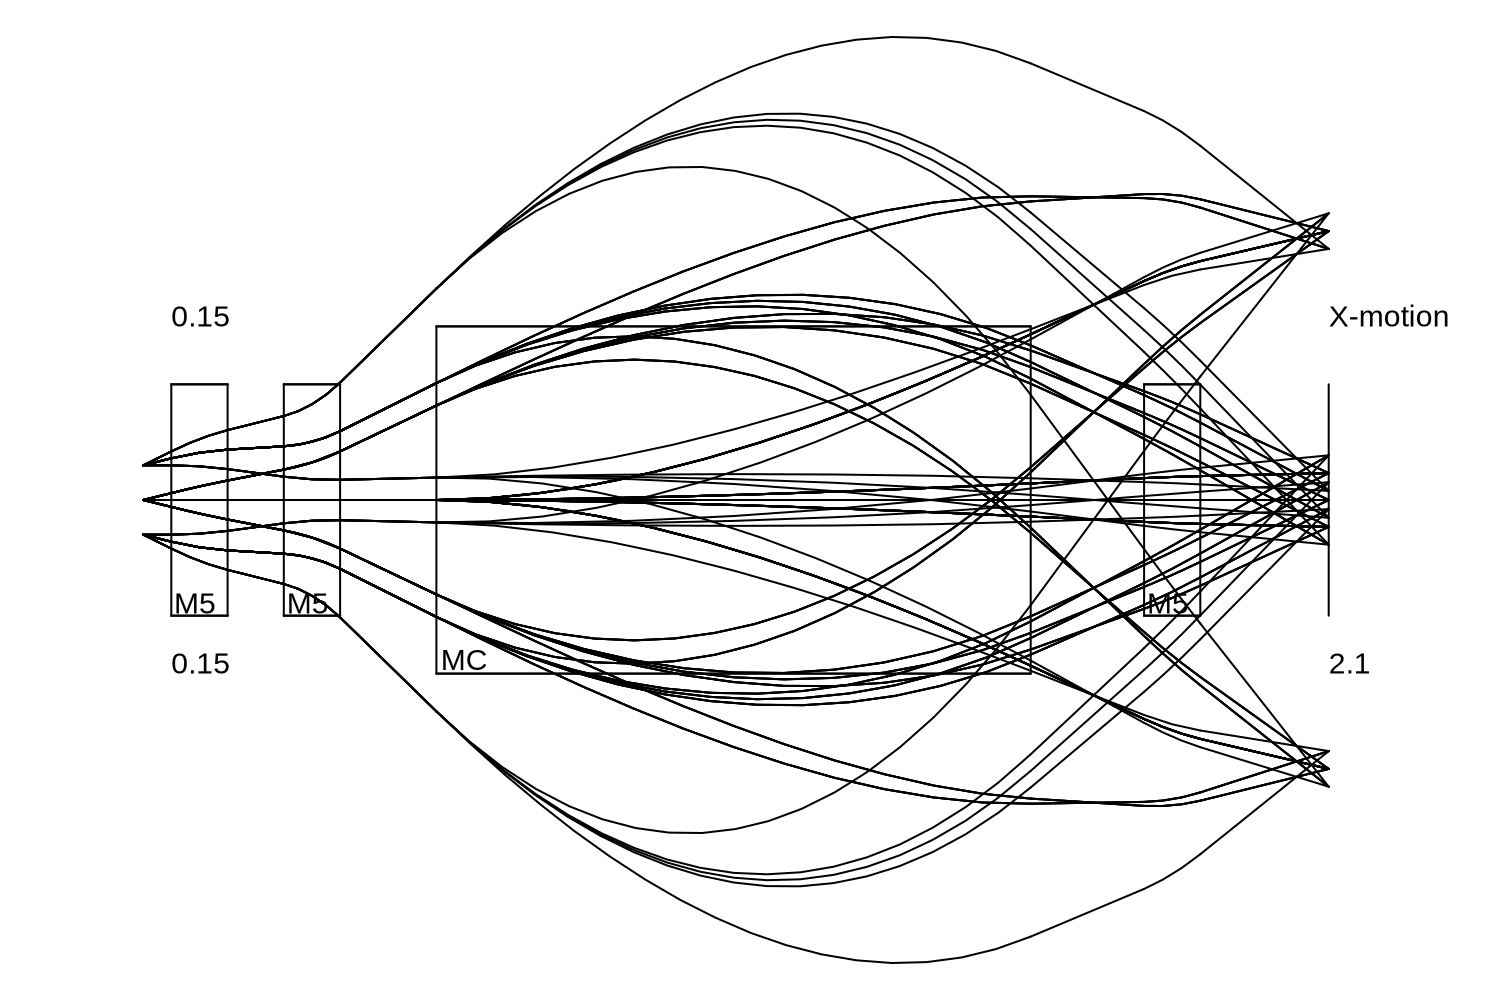

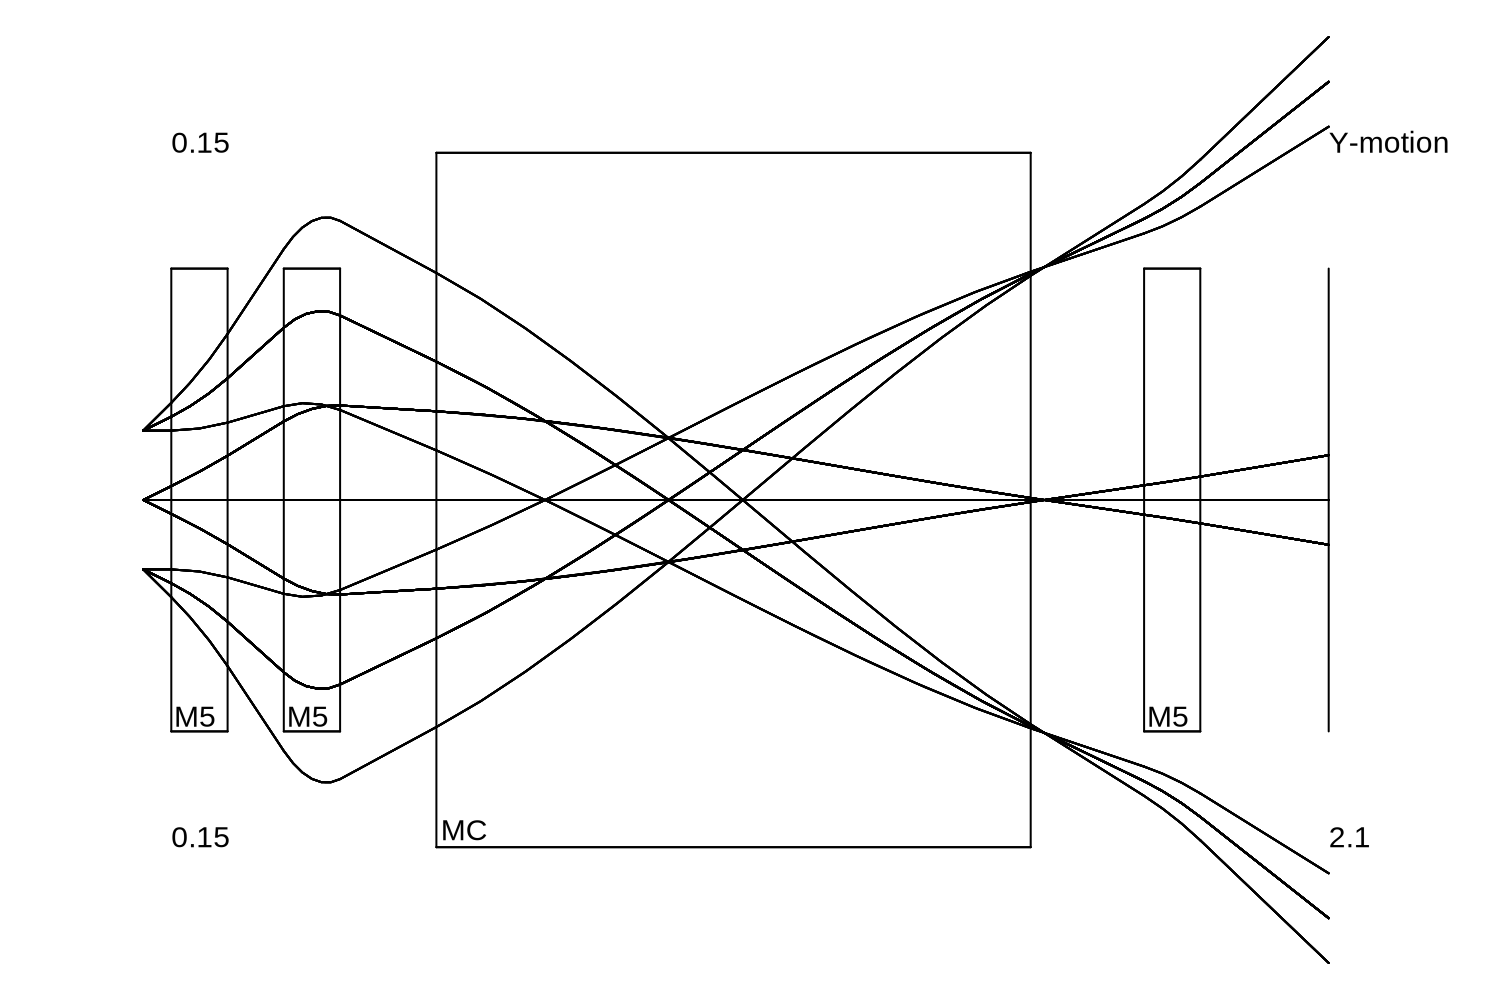

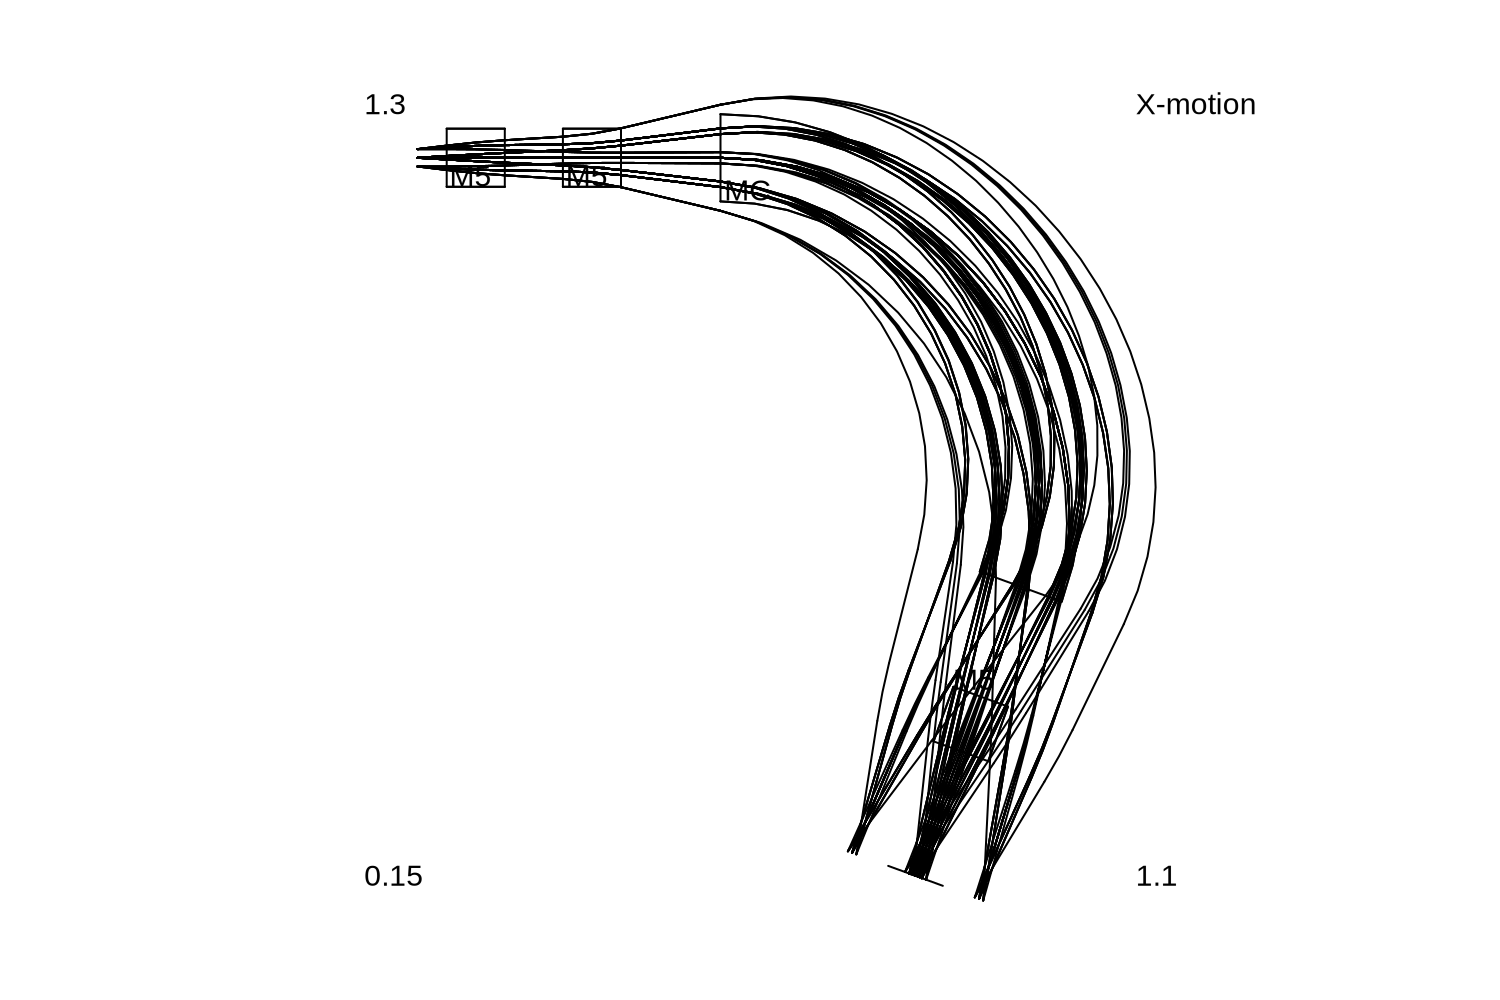

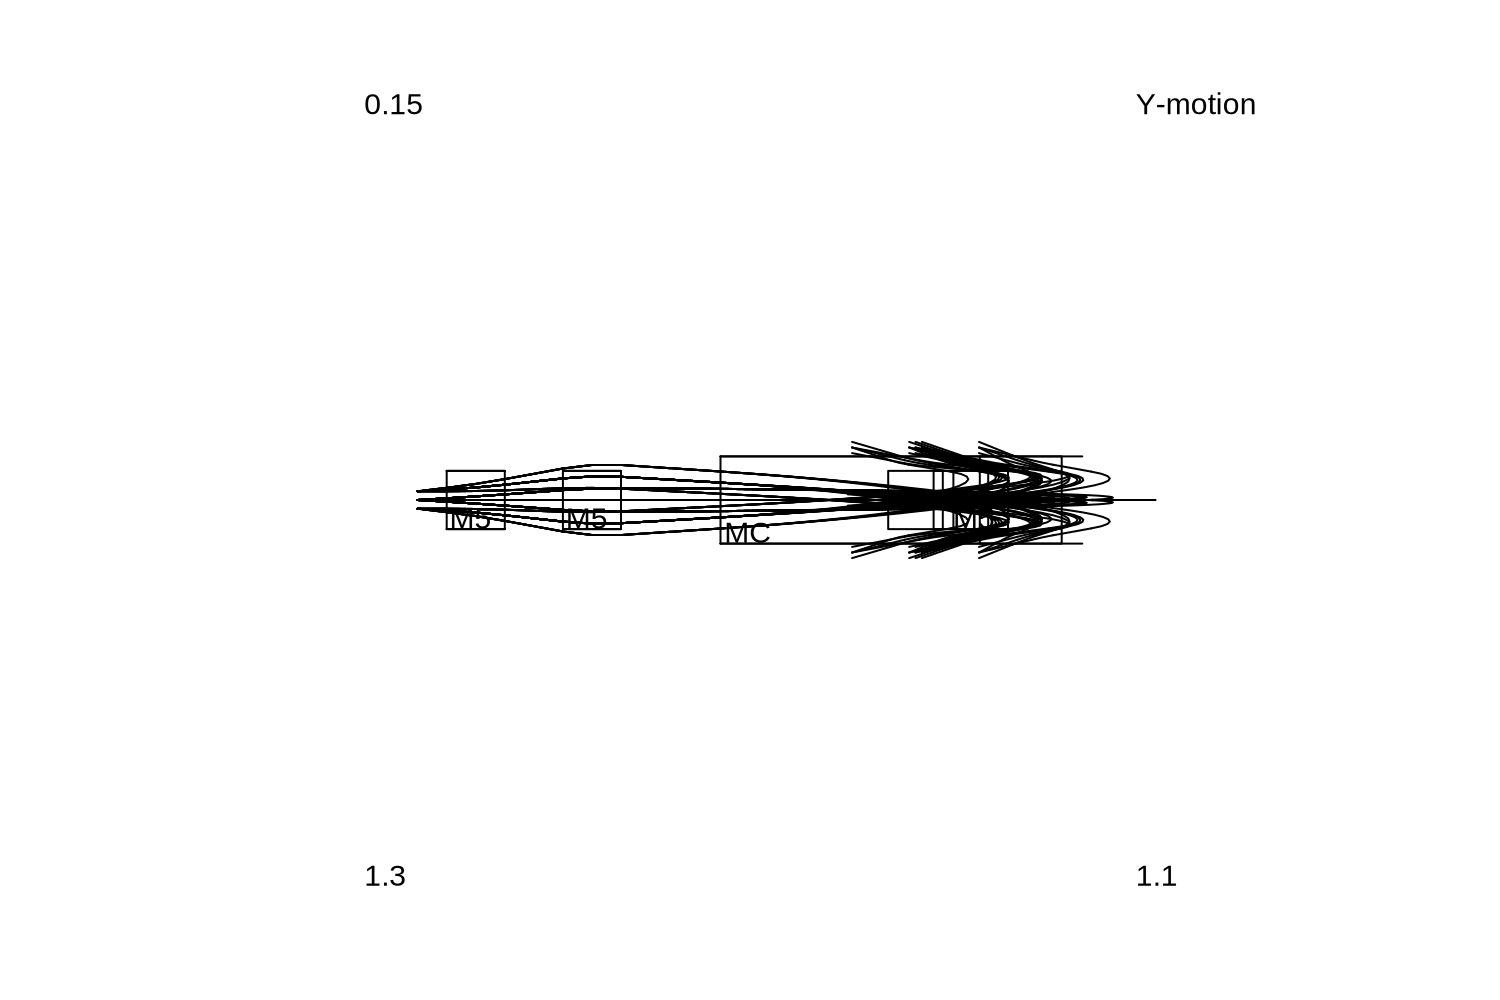

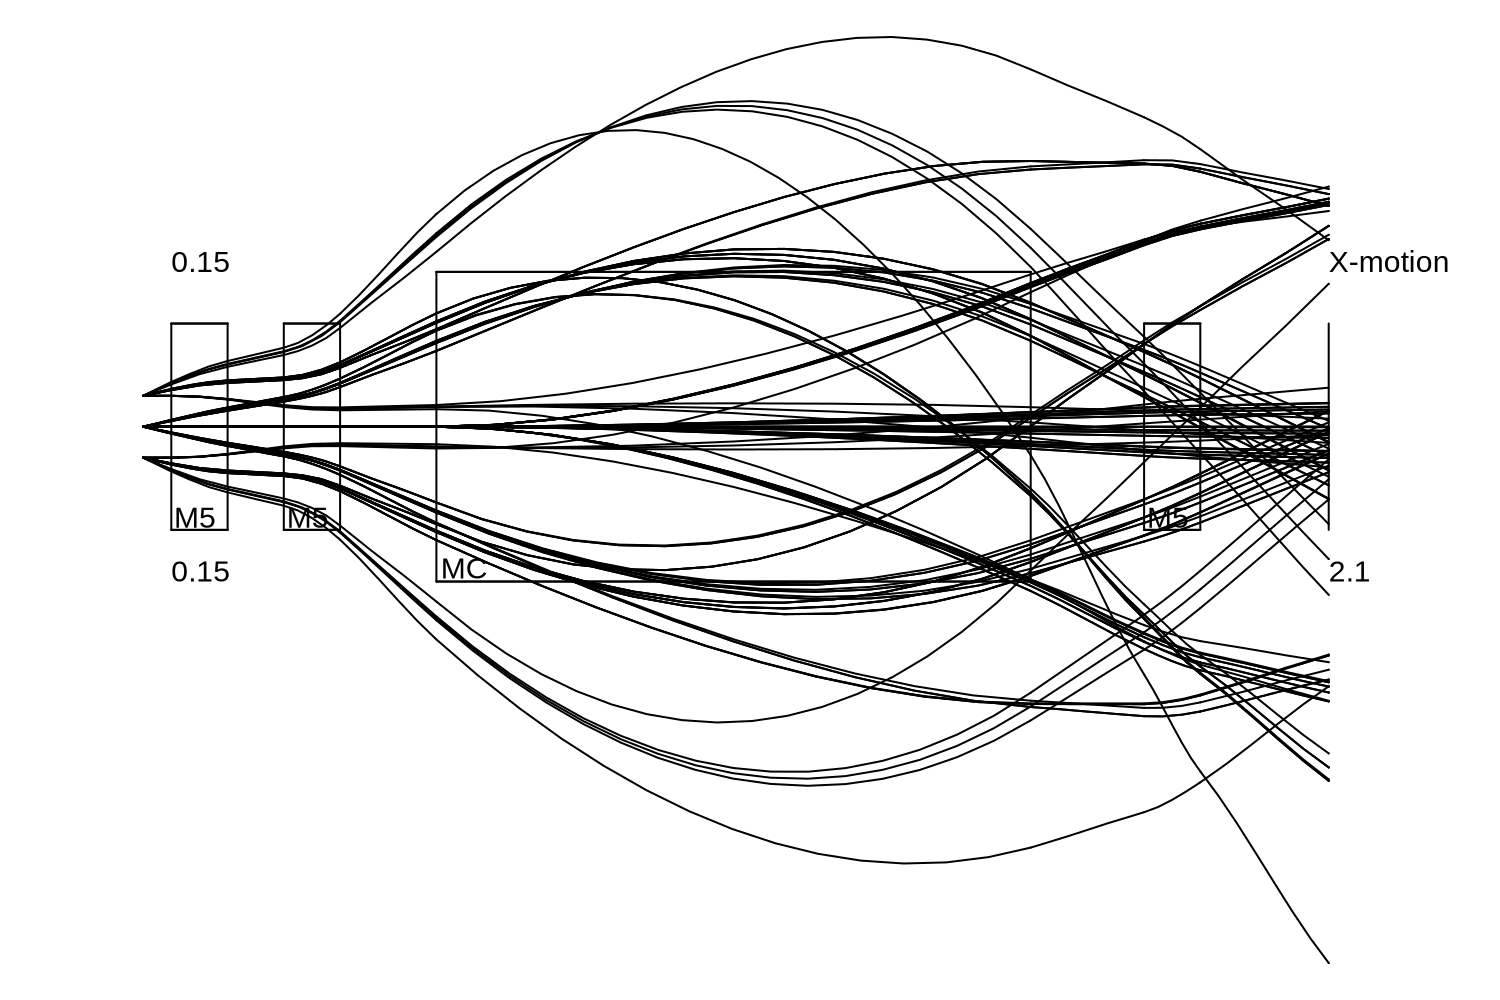

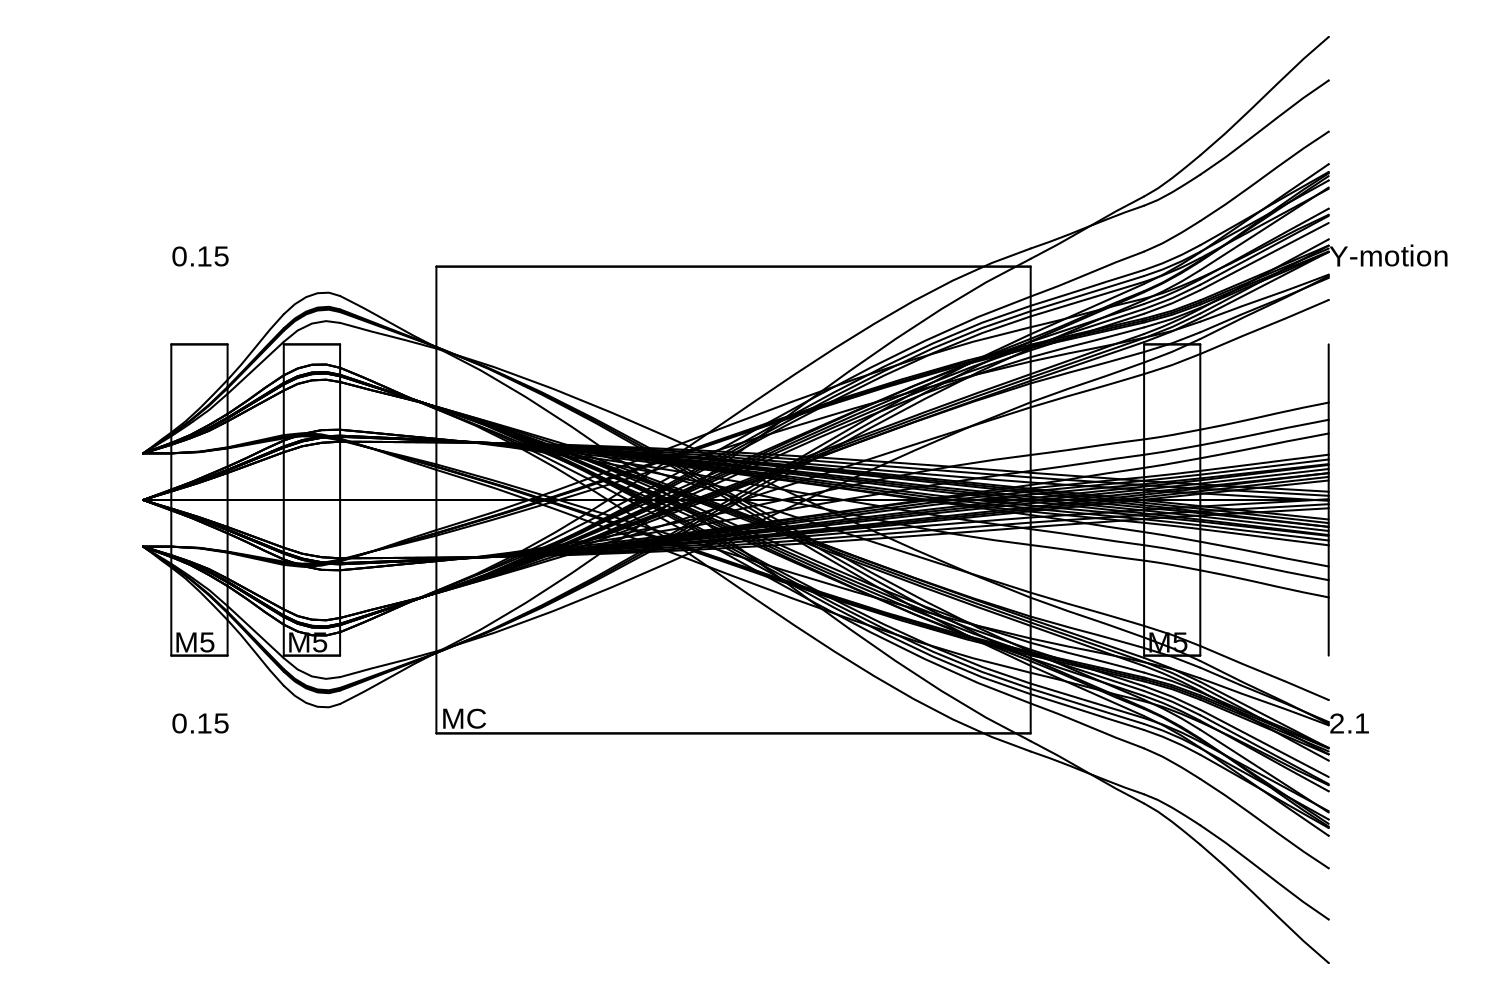

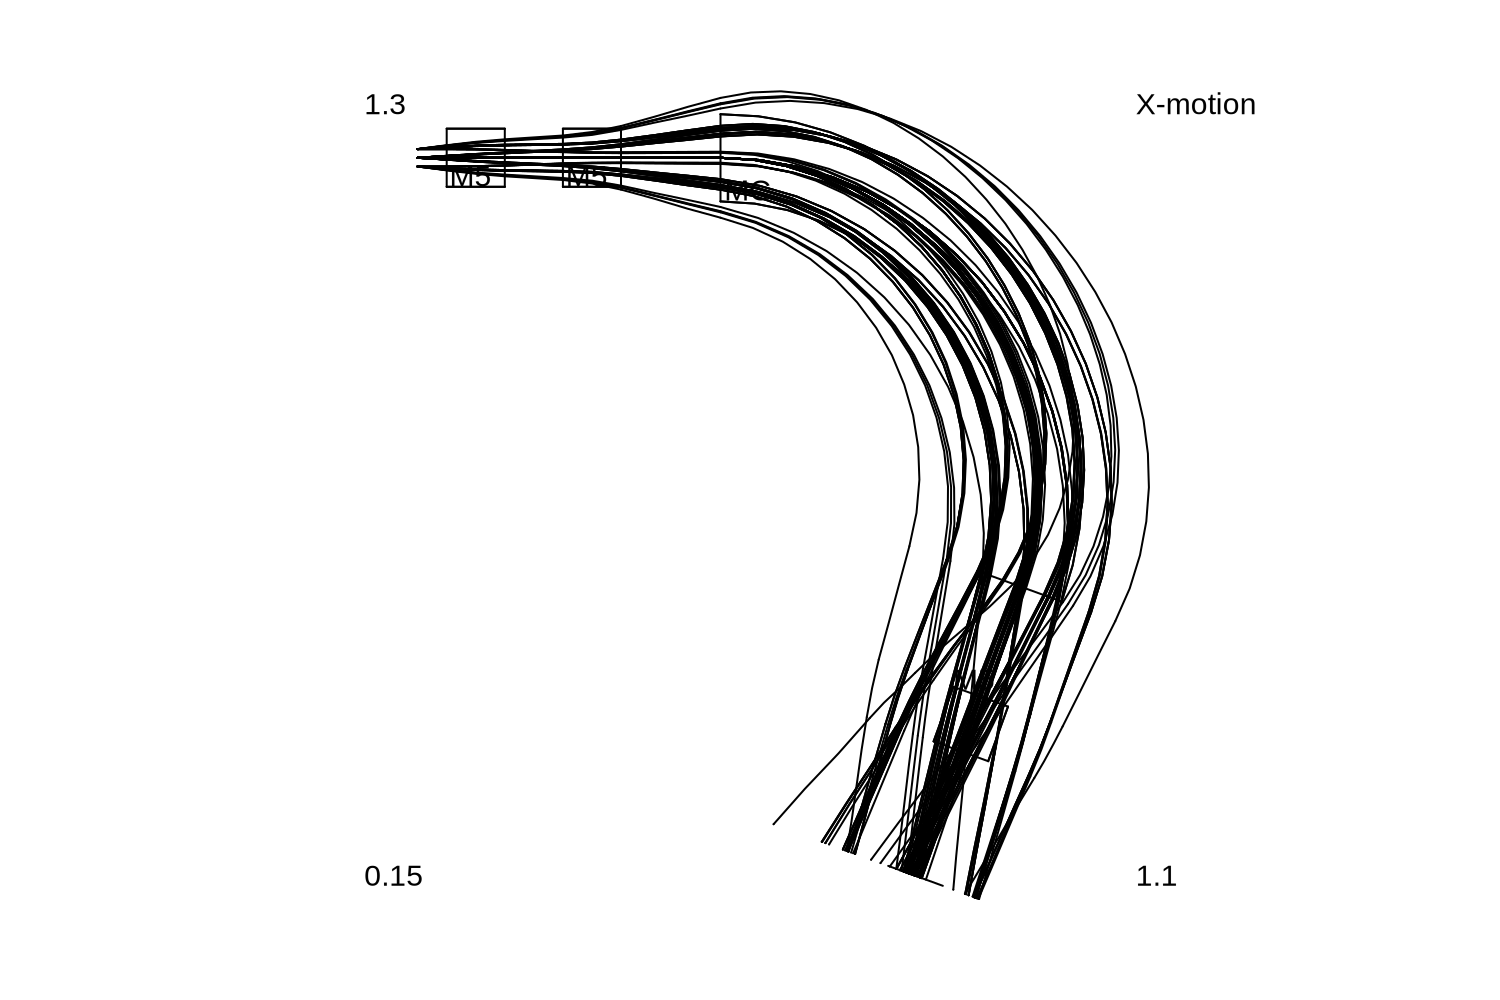

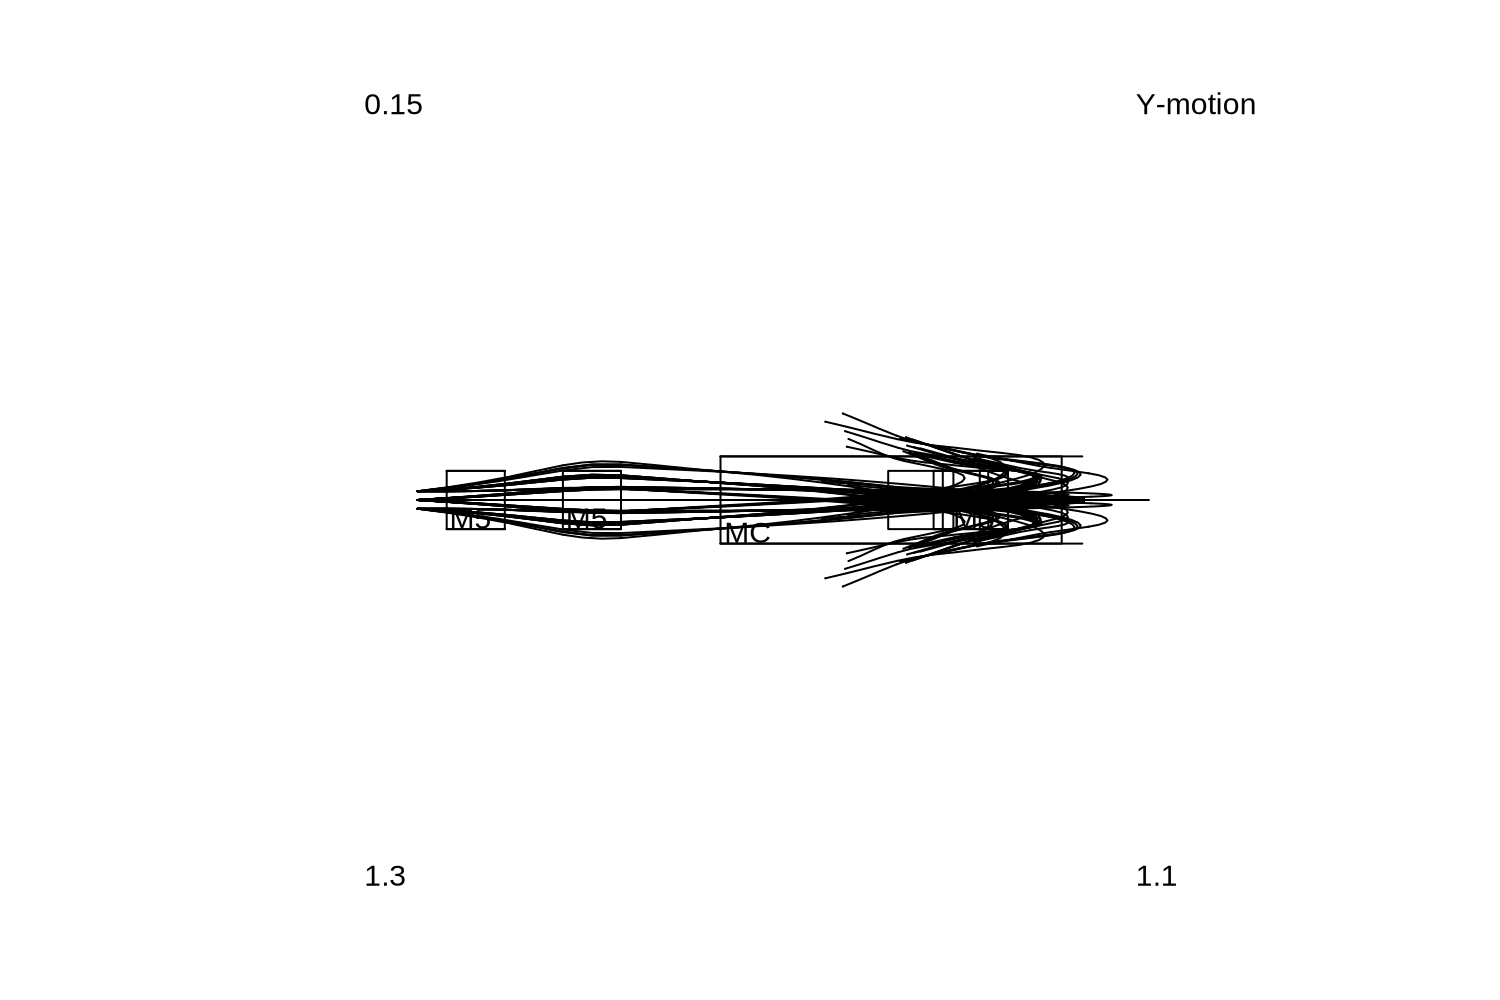

Resolution [order = 1]: 0.21322715740296613
Resolution [order = 5]: 0.32382451327050715


In [10]:
(sess
    .set_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3), color=6)
    .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3, energy=-0.1), color=8)
    .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3, energy=0.1), color=7)
    .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3, energy=-0.01), color=3)
    .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3, energy=0.01), color=2)
)

for svg_data in sess.config_vis_lab_coordinates(False).config_order(1).exec_svg():
    display_svg(SVG(data=svg_data))
for svg_data in sess.config_vis_lab_coordinates(True).config_order(1).exec_svg():
    display_svg(SVG(data=svg_data))
for svg_data in sess.config_vis_lab_coordinates(False).config_order(5).exec_svg():
    display_svg(SVG(data=svg_data))
for svg_data in sess.config_vis_lab_coordinates(True).config_order(5).exec_svg():
    display_svg(SVG(data=svg_data))


_, (
    # V_resolution,
    V_magnification,
    V_focus,
    V_dispersion,
    V_magnification_y,
    V_focus_y,
    # V_yarg,
    V_imagesize_x,
    V_imagesize_y,
), _, _ = sess.config_order(1).exec()
# V_resolution = np.abs(2 * R_APERTURE * V_magnification / V_dispersion)
V_resolution = np.abs(2 * V_imagesize_x / V_dispersion)
print(f"Resolution [order = 1]: {V_resolution}")
_, (
    # V_resolution,
    V_magnification,
    V_focus,
    V_dispersion,
    V_magnification_y,
    V_focus_y,
    # V_yarg,
    V_imagesize_x,
    V_imagesize_y,
), _, _ = sess.config_order(5).exec()
# V_resolution = np.abs(2 * R_APERTURE * V_magnification / V_dispersion)
V_resolution = np.abs(2 * V_imagesize_x / V_dispersion)
print(f"Resolution [order = 5]: {V_resolution}")

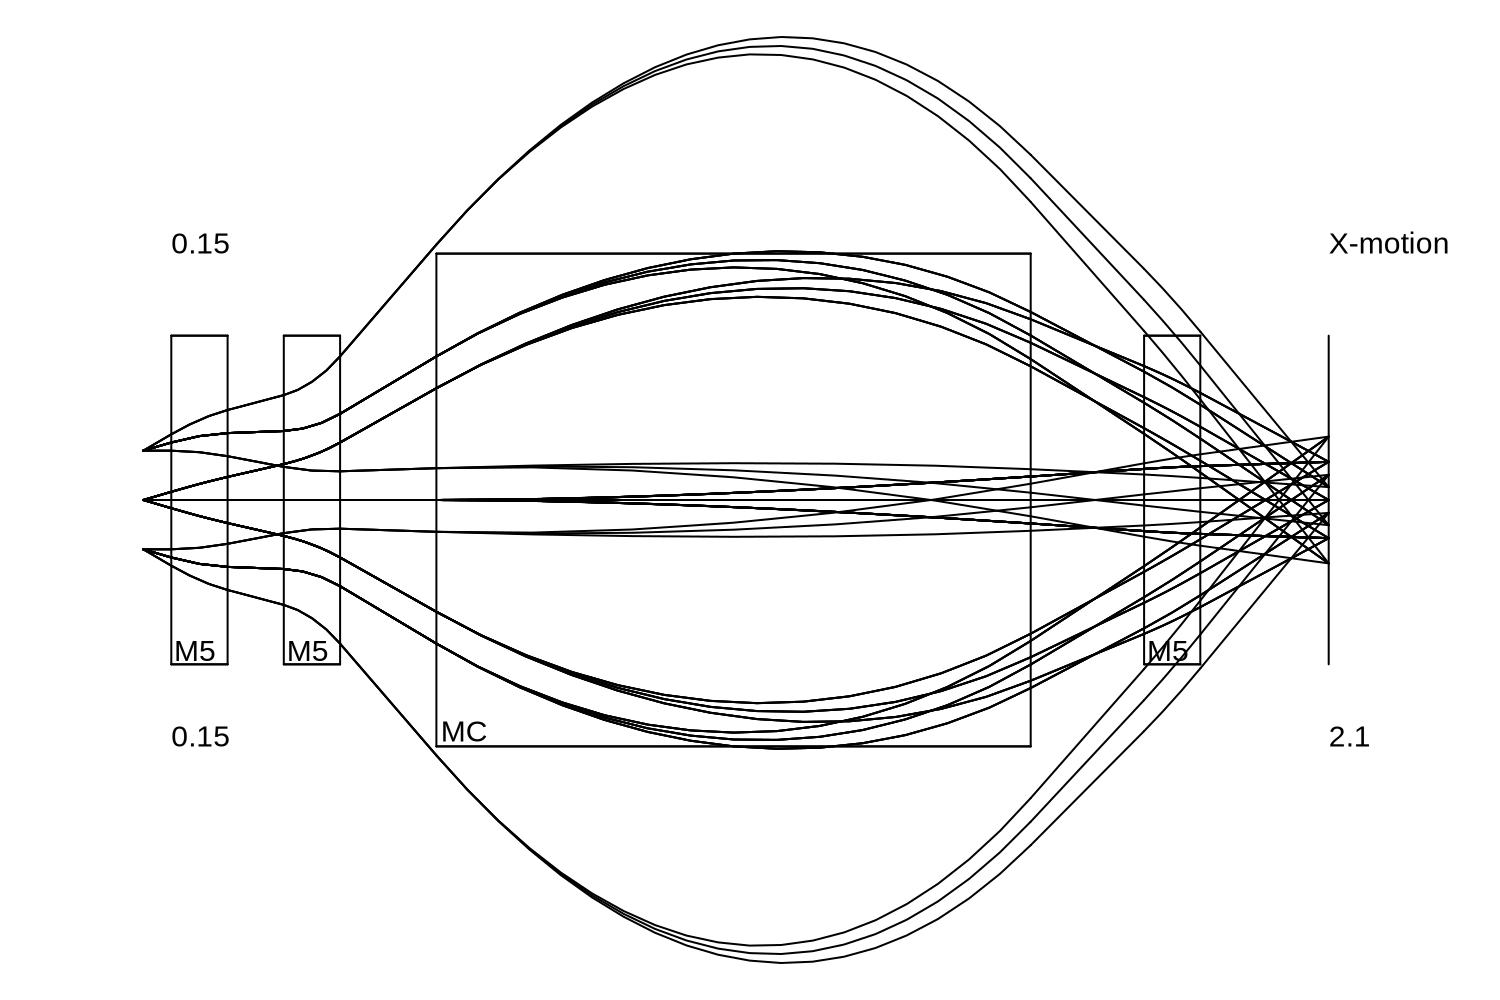

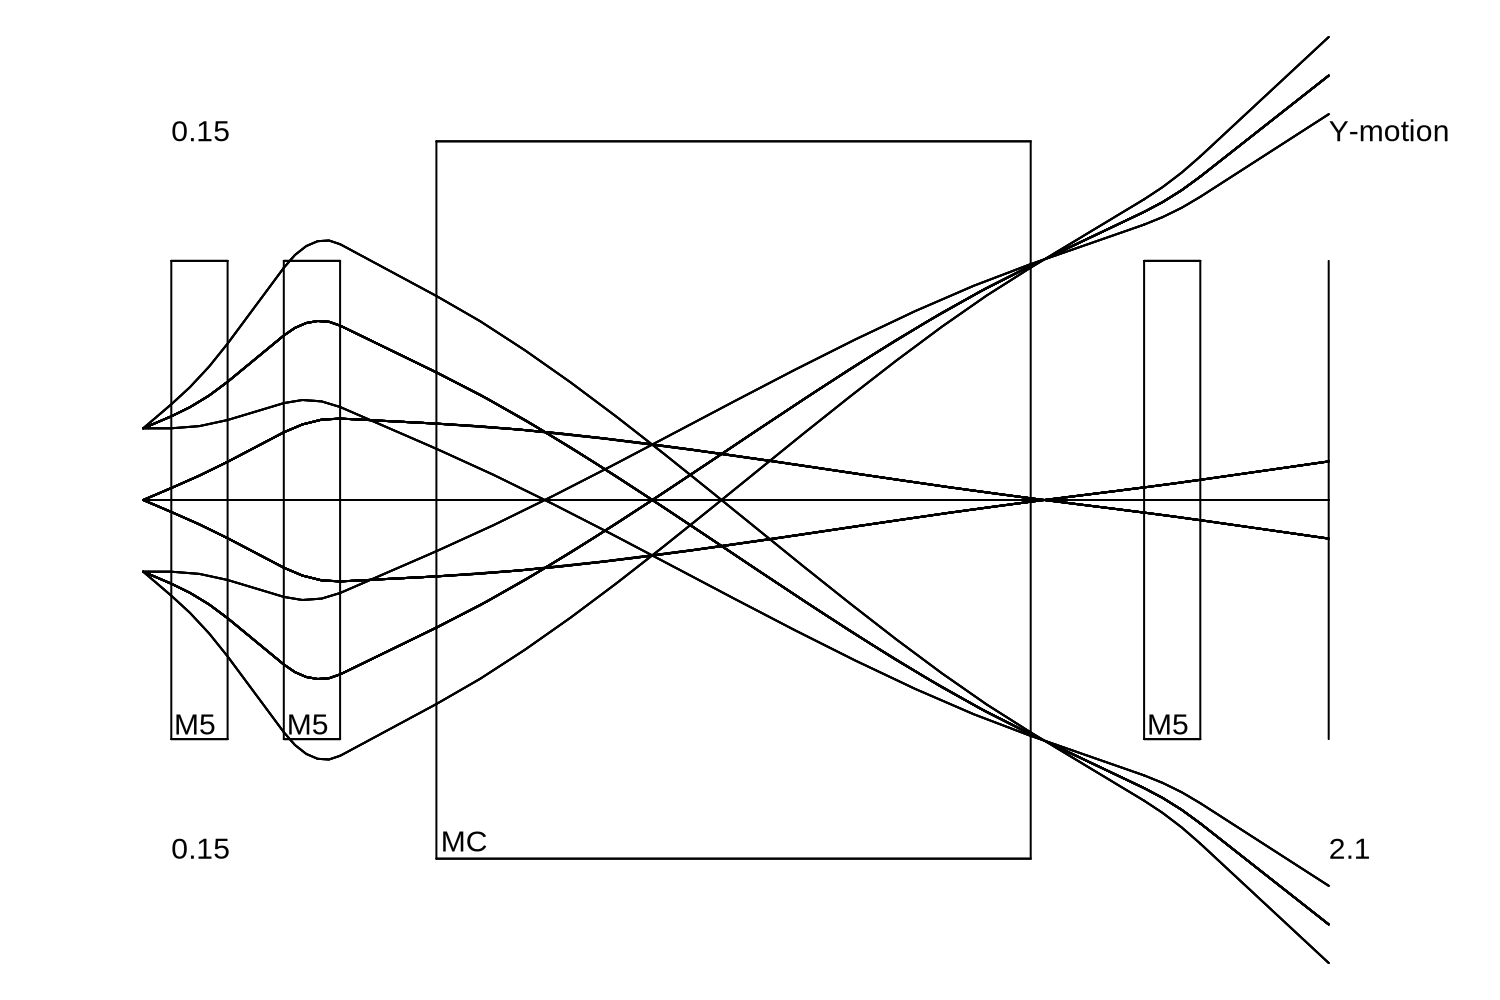

({'p_bend_radius': np.float64(0.55),
  'p_bend_angle': np.float64(110.0),
  'p_drift_post_aperture': np.float64(0.05),
  'p_drift_pre_bend': np.float64(0.1711294047732842),
  'p_drift_post_bend': np.float64(0.2014765625),
  'p_drift_pre_hodoscope': np.float64(0.228115896571998),
  'p_m5a_length': np.float64(0.1),
  'p_m5a_quad': np.float64(-0.06233481854188321),
  'p_m5a_hex': np.float64(0.0),
  'p_m5a_oct': np.float64(0.0),
  'p_m5a_dec': np.float64(0.0),
  'p_m5a_dodec': np.float64(0.0),
  'p_m5b_length': np.float64(0.1),
  'p_m5b_quad': np.float64(0.115469210096311),
  'p_m5b_hex': np.float64(0.0),
  'p_m5b_oct': np.float64(0.0),
  'p_m5b_dec': np.float64(0.0),
  'p_m5b_dodec': np.float64(0.0),
  'p_shape_in_1': np.float64(0.2985833653414149),
  'p_shape_in_2': np.float64(0.0),
  'p_shape_in_3': np.float64(0.0),
  'p_shape_in_4': np.float64(0.0),
  'p_shape_in_5': np.float64(0.0),
  'p_shape_out_1': np.float64(0.176719510472977),
  'p_shape_out_2': np.float64(0.0),
  'p_shape_out_3'

In [62]:

R_FOIL = 0.015
L_DRIFT = 0.3
R_APERTURE = 0.015
for svg_data in (sess
                 .set_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3), color=6)
                 .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3, energy=-0.01), color=3)
                 .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3, energy=0.01), color=2)
                 .config_vis_lab_coordinates(False)
                 .exec_svg()):
    display_svg(SVG(data=svg_data))
sess.exec()

In [4]:
import numpy as np
r1, r2 = zip(*([x,[x,2,4]] for x in [1,2,3]))
np.array(r1), np.array(r2)

(array([1, 2, 3]),
 array([[1, 2, 4],
        [2, 2, 4],
        [3, 2, 4]]))